In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# ignore warnings
warnings.filterwarnings("ignore")

from math import radians, cos, sin, asin, sqrt
from datetime import datetime

ModuleNotFoundError: No module named 'seaborn'

In [2]:
train= pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


**Data Description**
* id - a unique identifier for each trip
* vendor_id - a code indicating the provider associated with the trip record
* pickup_datetime - date and time when the meter was engaged
* dropoff_datetime - date and time when the meter was disengaged
* passenger_count - the number of passengers in the vehicle (driver entered value)
* pickup_longitude - the longitude where the meter was engaged
* pickup_latitude - the latitude where the meter was engaged
* dropoff_longitude - the longitude where the meter was disengaged
* dropoff_latitude - the latitude where the meter was disengaged
* store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* trip_duration - duration of the trip in seconds, target variable

**Train Data**

In [4]:
train.info()
train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


(1458644, 11)

In [5]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


**Test Data**

In [6]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [7]:
test.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
dtype: object

In [8]:
test.shape

(625134, 9)

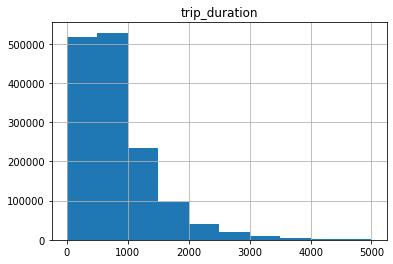

In [9]:
train.loc[train['trip_duration'] < 5000, 'trip_duration'].hist();

plt.title('trip_duration')
plt.show()

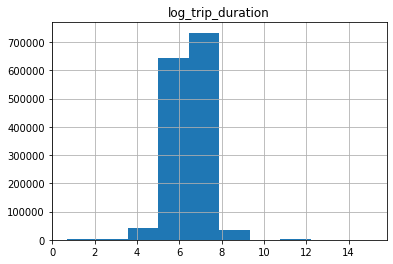

In [10]:
np.log1p(train['trip_duration']).hist();
plt.title('log_trip_duration')
plt.show()

**Cleaning the data**

In [12]:
train = train[(train.trip_duration < 5000)]

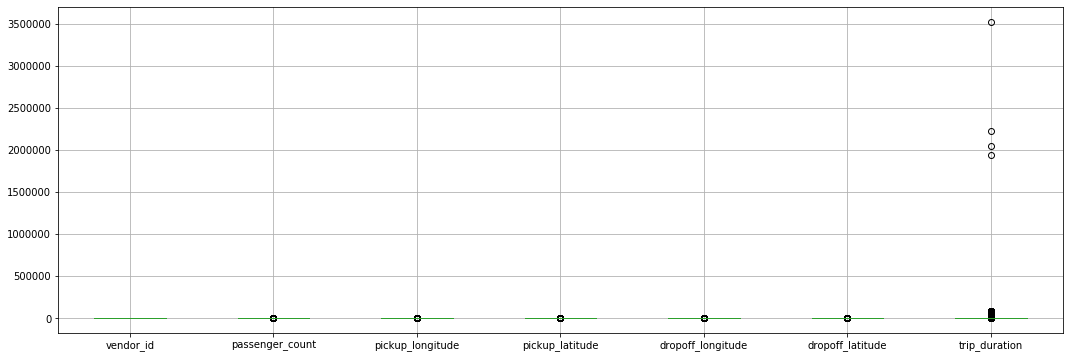

In [11]:
plt.subplots(figsize=(18,6))
train.boxplot()

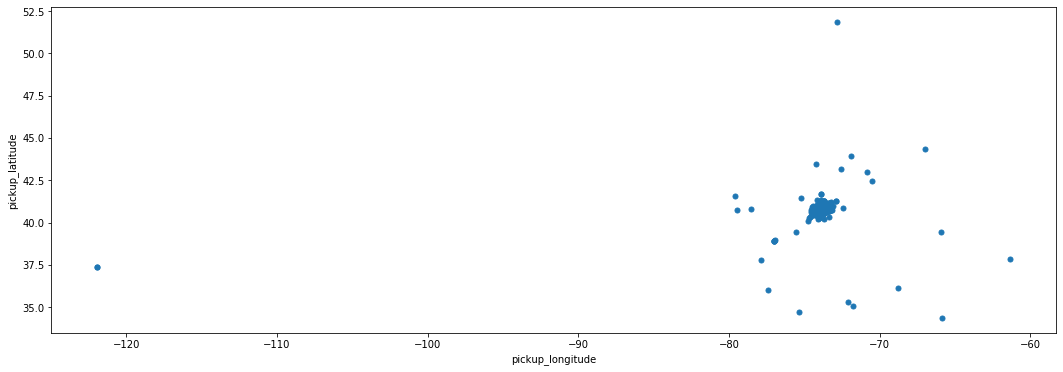

In [13]:
plt.subplots(figsize=(18,6))
plt.plot(train['pickup_longitude'], train['pickup_latitude'], '.', alpha = 1, markersize = 10)
plt.xlabel('pickup_longitude')
plt.ylabel('pickup_latitude')
plt.show()

In [14]:
train = train.loc[(train['pickup_longitude'] > -75) & (train['pickup_longitude'] < -73)]
train = train.loc[(train['pickup_latitude'] > 40) & (train['pickup_latitude'] < 41)]
# 구글지도에서 눈대중으로 가져온 경도와 위도 경계

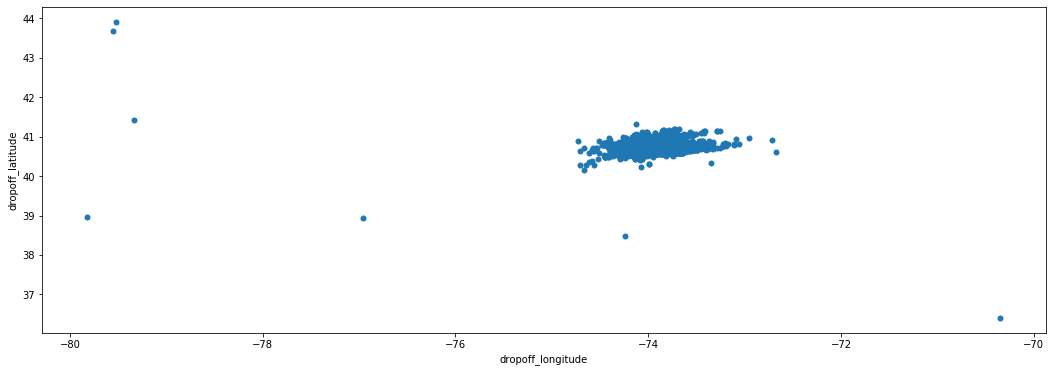

In [15]:
plt.subplots(figsize=(18,6))
plt.plot(train['dropoff_longitude'], train['dropoff_latitude'], '.', alpha = 1, markersize = 10)
plt.xlabel('dropoff_longitude')
plt.ylabel('dropoff_latitude')
plt.show()

In [16]:
train = train.loc[(train['dropoff_longitude'] > -75) & (train['dropoff_longitude'] < -73)]
train = train.loc[(train['dropoff_latitude'] > 40.5) & (train['dropoff_latitude'] < 41.5)]

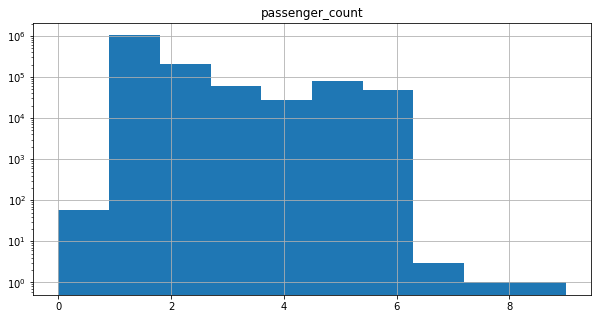

In [17]:
train['passenger_count'].hist(bins=10, log=True, figsize=(10,5));
plt.title('passenger_count')
plt.show()

In [18]:
train = train.loc[(train['passenger_count'] > 0) & (train['passenger_count'] <= 6)]

In [19]:
train.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [20]:
train.drop(["store_and_fwd_flag"], axis=1, inplace=True)
test.drop(["store_and_fwd_flag"], axis=1, inplace=True)  # 뺴지말고 넣고도 돌려볼 것

In [21]:
train.shape, test.shape

((1454668, 10), (625134, 8))

In [22]:
def ft_haversine_distance(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371 #km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h
# 출처 https://www.kaggle.com/quentinmonmousseau/ml-workflow-lightgbm-0-37-randomforest-0-39

def euclidean_distance(lat1, lng1, lat2, lng2):
    h = sqrt(np.sum((lat2-lat2)**2,(lng2-lng1)**2))
    return h
# 지구는 구 임을 감안하면 haversine 거리를 사용하는 것이 더 맞지만, NewYork이라는 도시로 한정했기 때문에 다른 거리도 생각해볼 수 있다 

In [23]:
train['distance'] = ft_haversine_distance(train['pickup_latitude'].values,
                                                 train['pickup_longitude'].values, 
                                                 train['dropoff_latitude'].values,
                                                 train['dropoff_longitude'].values)
#train_data['distance'] = euclidean_distance(train_data['pickup_latitude'].values,
                                                 #train_data['pickup_longitude'].values, 
                                                 #train_data['dropoff_latitude'].values,
                                                 #train_data['dropoff_longitude'].values)%%time
test['distance'] = ft_haversine_distance(test['pickup_latitude'].values,
                                                 test['pickup_longitude'].values, 
                                                 test['dropoff_latitude'].values,
                                                 test['dropoff_longitude'].values)
#test_data['distance'] = euclidean(test_data['pickup_latitude'].values,
                                                 #test_data['pickup_longitude'].values, 
                                                 #test_data['dropoff_latitude'].values,
                                                 #test_data['dropoff_longitude'].values)

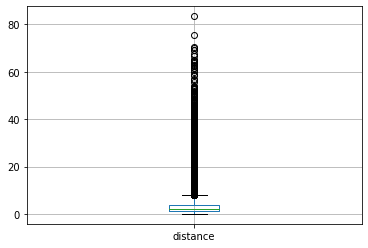

In [24]:
#Visualize distance outliers
train.boxplot(column='distance', return_type='axes');

In [25]:
train = train[train['distance']<200]

In [26]:
#datetime
train['pickup_datetime'] = pd.to_datetime(train.pickup_datetime)
test['pickup_datetime'] = pd.to_datetime(test.pickup_datetime)

train = train.drop('dropoff_datetime',axis=1) # test_data에는 존재하지 않는 열이므로 삭제해준다
#datetime 
train['month'] = train.pickup_datetime.dt.month
train['week'] = train.pickup_datetime.dt.weekday
train['weekday'] = train.pickup_datetime.dt.day
train['hour'] = train.pickup_datetime.dt.hour
train['minute'] = train.pickup_datetime.dt.minute
train['minute_oftheday'] = train['hour'] * 60 + train['minute']
train = train.drop('pickup_datetime', axis=1)
train = train.drop('minute', axis=1)


test['month'] = test.pickup_datetime.dt.month
test['week'] = test.pickup_datetime.dt.weekday
test['weekday'] = test.pickup_datetime.dt.day
test['hour'] = test.pickup_datetime.dt.hour
test['minute']= test.pickup_datetime.dt.minute
test['minute_oftheday'] = test['hour'] * 60 + test['minute']
test = test.drop('pickup_datetime', axis=1)
test = test.drop('minute',axis=1)

train = train.drop('id', axis=1)
test = test.drop('id', axis=1)

In [44]:
train.shape, test.shape

((1454668, 12), (625134, 12))

In [29]:
Y = np.log(train['trip_duration'])
train= train.drop('trip_duration',axis=1)

In [31]:
from xgboost.sklearn import XGBRegressor  
from sklearn.metrics import accuracy_score
#from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.ensemble import VotingRegressor 업데이트 하고 써보자


In [33]:
xgb=XGBRegressor(learning_rate=0.1, n_estimators=50, max_depth=30, n_jobs=-1)
regr = RandomForestRegressor(bootstrap=True, criterion='mse',max_features=12,n_estimators=5, max_leaf_nodes=5,min_samples_split=5, n_jobs=-1)

In [34]:
n_folds=3
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42)
    rmse= np.sqrt(-cross_val_score(model, train, np.exp(Y), scoring="neg_mean_squared_error", cv = kf)) #Scikit learn returns negative vals
    return(rmse)                                #np.exp(Y): log 했던 것 다시 돌림

In [45]:
%%time
score = rmsle_cv(xgb)
print("score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[16:09:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:41:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:15:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
score: 276.7151 (0.5096)

CPU times: user 1h 37min 2s, sys: 50.6 s, total: 1h 37min 52s
Wall time: 1h 39min 7s
